<a href="https://colab.research.google.com/github/Shezan57/DL-Journey/blob/main/music_genre_classification_gtzan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# download dataset from kaggle
import kagglehub

In [3]:
path = kagglehub.dataset_download('andradaolteanu/gtzan-dataset-music-genre-classification')
print(path)

100%|██████████| 1.21G/1.21G [00:55<00:00, 23.3MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [4]:
import pandas as pd

In [8]:
features_30_sec = pd.read_csv(path+'/Data/features_30_sec.csv')

In [9]:
features_30_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [10]:
features_3_sec = pd.read_csv(path+'/Data/features_3_sec.csv')

In [11]:
features_3_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [18]:
# non numeric cols
non_numeric_cols = features_30_sec.select_dtypes(exclude=['float64', 'int64']).columns
print('Non numeric columns: ', non_numeric_cols)

Non numeric columns:  Index(['filename', 'label'], dtype='object')


In [19]:
X = features_30_sec.drop(columns=non_numeric_cols)

In [25]:
# separate features label
y = features_30_sec['label']
X = features_30_sec.drop(columns=['filename','label'])

In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import StandardScaler

In [27]:
# Encode labels
le = LabelEncoder()
y_le = le.fit_transform(y)
y_cat = to_categorical(y_le)

In [28]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [63]:
# Reshape features for BiLSTM (samples, time_steps, features)
time_steps = 1  # Single time step since features are static
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1]))

# Build BiLSTM model
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=True), input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(16, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(12)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(24, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_14 (Bidirectional)     │ (None, 1, 64)               │          23,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 1, 32)               │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ (None, 24)                  │           4,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,826 (155.57 KB)

 Trainable params: 39,826 (155.57 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [65]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=callback,validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.1277 - loss: 2.3012 - val_accuracy: 0.2125 - val_loss: 2.2975
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2443 - loss: 2.2898 - val_accuracy: 0.2750 - val_loss: 2.2760
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2452 - loss: 2.2593 - val_accuracy: 0.2625 - val_loss: 2.2062
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3068 - loss: 2.1466 - val_accuracy: 0.2625 - val_loss: 2.0429
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3050 - loss: 1.9748 - val_accuracy: 0.2625 - val_loss: 1.8688
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.8254 - val_accuracy: 0.2937 - val_loss: 1.7469
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3704 - loss: 1.6710 - val_accuracy: 0.3125 - val_loss: 1.6624
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3579 - loss: 1.6238 - val_accuracy: 0.3187 - v

In [66]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6115 - loss: 1.8836  
Test Accuracy: 61.00%


In [38]:
# Predict genres for the test set
predictions = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Compare with actual labels
actual_labels = le.inverse_transform(np.argmax(y_test, axis=1))
print(list(zip(predicted_labels, actual_labels)))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[('disco', 'jazz'), ('pop', 'pop'), ('pop', 'pop'), ('metal', 'metal'), ('hiphop', 'hiphop'), ('metal', 'metal'), ('metal', 'metal'), ('jazz', 'jazz'), ('reggae', 'reggae'), ('classical', 'classical'), ('disco', 'reggae'), ('blues', 'blues'), ('metal', 'metal'), ('disco', 'rock'), ('hiphop', 'rock'), ('metal', 'reggae'), ('disco', 'country'), ('pop', 'reggae'), ('pop', 'pop'), ('reggae', 'disco'), ('pop', 'jazz'), ('classical', 'classical'), ('disco', 'disco'), ('jazz', 'jazz'), ('country', 'country'), ('country', 'country'), ('classical', 'classical'), ('disco', 'rock'), ('disco', 'rock'), ('hiphop', 'rock'), ('disco', 'disco'), ('classical', 'classical'), ('metal', 'metal'), ('hiphop', 'hiphop'), ('disco', 'disco'), ('classical', 'classical'), ('hiphop', 'metal'), ('jazz', 'jazz'), ('rock', 'rock'), ('metal', 'blues'), ('disco', 'disco'), ('country', 'blues'), ('disco', 'disco'), ('rock', 'rock'), ('blues', 'country'), ('country', 'country'), ('r

In [67]:
from tensorflow.keras.layers import GRU

In [83]:
# Reshape features for BiGRU (samples, time_steps, features)
time_steps = 1  # Single time step since features are static
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1]))

# Build BiLSTM model
model1 = Sequential([
    Bidirectional(GRU(128, return_sequences=True), input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(GRU(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_24 (Bidirectional)     │ (None, 1, 256)              │         144,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_25 (Bidirectional)     │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,938 (1.06 MB)

 Trainable params: 276,938 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1955 - loss: 2.2044 - val_accuracy: 0.3938 - val_loss: 1.7775
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4303 - loss: 1.6422 - val_accuracy: 0.4313 - val_loss: 1.4451
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5269 - loss: 1.3527 - val_accuracy: 0.5750 - val_loss: 1.2154
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6316 - loss: 1.1596 - val_accuracy: 0.6062 - val_loss: 1.0758
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6583 - loss: 0.9901 - val_accuracy: 0.6438 - val_loss: 0.9728
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7211 - loss: 0.8507 - val_accuracy: 0.6875 - val_loss: 0.9026
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7520 - loss: 0.7639 - val_accuracy: 0.6750 - val_loss: 0.8518
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7881 - loss: 0.6413 - val_accuracy: 0.7063 - val_lo

In [85]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7021 - loss: 1.6572  
Test Accuracy: 70.00%


In [90]:
from tensorflow.keras.layers import SimpleRNN

In [91]:
# Reshape features for BiRNN (samples, time_steps, features)
time_steps = 1  # Single time step since features are static
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1]))

# Build BiLSTM model
model2 = Sequential([
    Bidirectional(SimpleRNN(128, return_sequences=True), input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_26 (Bidirectional)     │ (None, 1, 256)              │          47,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_27 (Bidirectional)     │ (None, 128)                 │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,866 (382.29 KB)

 Trainable params: 97,866 (382.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.2444 - loss: 2.1410 - val_accuracy: 0.4938 - val_loss: 1.5286
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4559 - loss: 1.5499 - val_accuracy: 0.5562 - val_loss: 1.2407
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 1.2886 - val_accuracy: 0.5938 - val_loss: 1.1063
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6450 - loss: 1.0904 - val_accuracy: 0.6438 - val_loss: 1.0244
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.9829 - val_accuracy: 0.6750 - val_loss: 0.9378
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.8900 - val_accuracy: 0.7125 - val_loss: 0.9043
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7560 - loss: 0.7570 - val_accuracy: 0.6938 - val_loss: 0.8584
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.7521 - val_accuracy: 0.6938 - val_loss

In [93]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7280 - loss: 1.2433
Test Accuracy: 71.50%


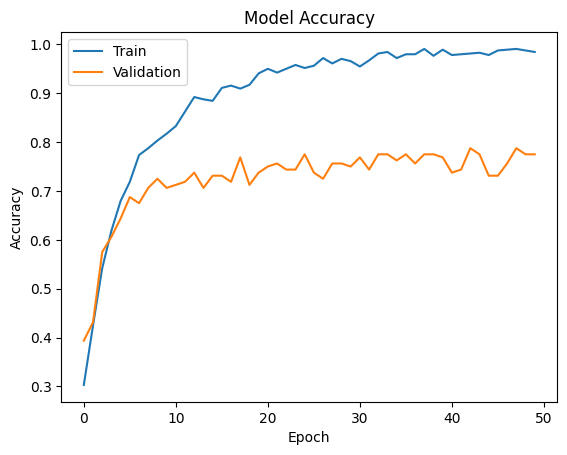

In [86]:
# accuracy loss graph
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

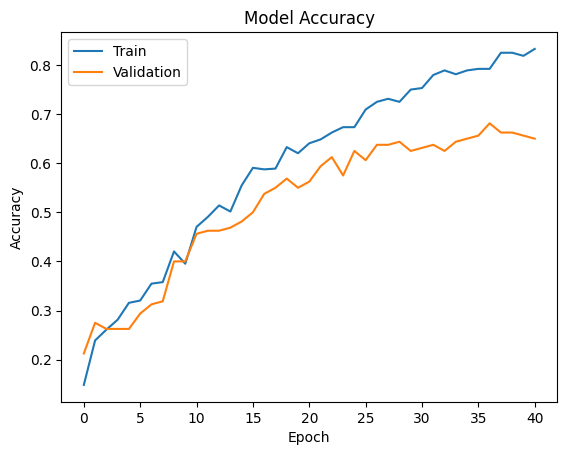

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

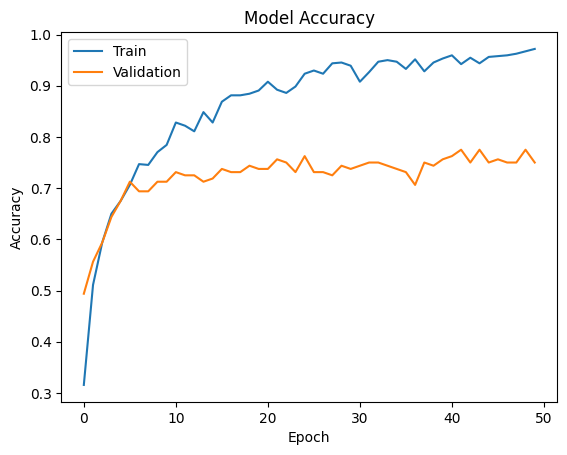

In [94]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()